In [79]:
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

Строим график плотности случайного вектора.

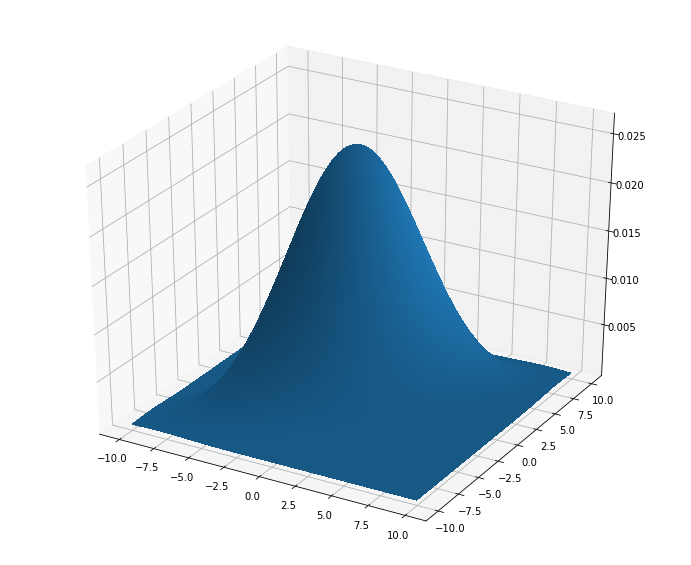

In [83]:
gr = np.mgrid[-10:10:0.05, -10:10:0.05] #Создаем сетку

#Создаем значение плотностей
den = np.array([[sts.multivariate_normal.pdf((gr[0, i, j], gr[1, i, j]), mean=[0, 0], cov=[[10, 8], [8, 10]])
                    for i in range(gr[0].shape[0])]
                    for j in range(gr[0].shape[1])])

#Постройка графика
myfig = plt.figure(figsize=(12, 10))
ax = myfig.gca(projection='3d')
s = ax.plot_surface(gr[0], gr[1], den, rstride=1, cstride=1, linewidth=0, antialiased=False)

plt.show()

Построим графики $f$

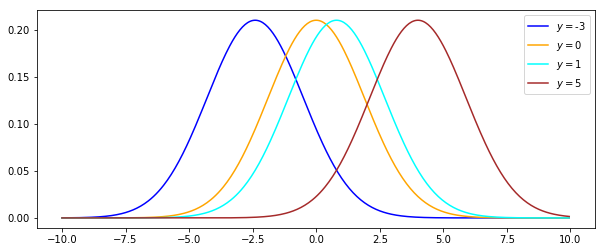

In [75]:
#Построение графиков
gr = np.linspace(-10, 10, 401)
col = ['blue', 'orange', 'cyan', 'brown']
num = 0;
plt.figure(figsize=(10, 4))
y = [-3, 0, 1, 5]
for i in xrange(4):
    while (gr[num] != y[i]):
        num += 1
    p = np.array(den[:][num]) / sps.norm.pdf(y[i], loc=0, scale=10 ** 0.5)
    plt.plot(gr[0:len(p)], p, color=col[i], label=r'$y=$' + str(y[i]))
plt.legend()
plt.show()

Построим график условного матожидания

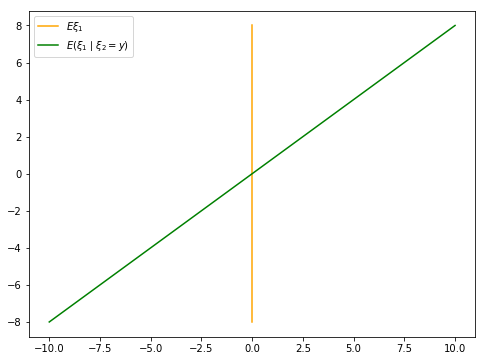

In [66]:
p = np.array([8. / 10 * i for i in gr])
plt.figure(figsize=(8, 6))
gr = np.linspace(-10, 10, 401)
plt.plot(np.zeros(401), np.linspace(-8, 8, 401), color='orange', label=r'$E\xi_1$')
plt.plot(gr, p, color='green', label=r'$E(\xi_1 \mid \xi_2 = y)$')
plt.legend()
plt.show()